# How diverse are archaeal histones?
## Approach 
To look at the diversity of histones in archaea we need to:
0. Collect all archaeal proteins.
1. Download hmm-profile to search against.
1. Identify which proteins are histones using hmmsearch.
2. Create database having at least gene name, sequence, genomic GC, and type of phile (use keywords and look through each species). 
3. Vizualize these histones on 3D scatterplot (length vs genomic GC vs pI).
4. Use half_blast to identify doublet proteins.
5. Use sklearn to cluster proteins:
    1. 3 dimensions: length, genomic GC, pI.
    2. n dimensions: 3-mer(or other mer of aligned protiens).
    3. n dimensions: each amino acid of aligned protiens.
6. Evaluate each cluster:
    1. Find average or median protein from each cluster.
    2. See what are the characteristic of each group.
    3. Figure out which phyla are represented in each cluster.

#### 1. Collect all archaeal proteins using slurm script on fiji. (will need to install NCBI's eDirect) ~11hrs for 6.3 mil proteins

In [7]:
!sbatch fetch_archaeal_proteins.q

/bin/sh: esearch: command not found
/bin/sh: efetch: command not found


#### The .fa file is named with a date, so as not to overwrite it next time (ex. archaeal_proteins_20191203.fa)
#### 2. Now we need to download the eukaryotic histone hmm-profile to search our database against.
To do this, we can just go to http://pfam.xfam.org/family/PF00125#tabview=tab3
Under format alignment, select: 
Alignment: Seed 
Format: Stockholm
Order: Tree
Sequence: Inserts lower case
Gaps: Gaps as "-" (dashes)
Download/view: Download

Once downloaded, move into working directory (ex. PF00125_seed.txt)

#### Time to build the hmm-profile
On fiji (or install hmmer on local machine) execute the following, will build .hmm file called euk_histones.hmm (you can also call build_hmm_profile.sh)

In [1]:
%%bash
module purge
module load hmmer
hmmbuild euk_histones.hmm PF00125_seed.txt

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.1b2 (February 2015); http://hmmer.org/
# Copyright (C) 2015 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             PF00125_seed.txt
# output HMM file:                  euk_histones.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     PF00125_seed            29   142   131     6.04  0.590 

# CPU time: 0.13u 0.01s 00:00:00.14 Elapsed: 00:00:00.15


#### 3. Use the archaeal protein fasta file and the hmm-profile to hmmsearch for archaeal histones. (might want to execute hmmsearch.q through sbatch instead). 

In [4]:
%%bash
module purge
module load hmmer
d=`date +%Y%m%d`
hmmsearch euk_histones.hmm archaeal_proteins_20191203.fa > arc_histones_hits_${d}.out

bash: line 1: sbatch: command not found


#### Output looks like:

 hmmsearch :: search profile(s) against a sequence database
 HMMER 3.1b2 (February 2015); http://hmmer.org/
 Copyright (C) 2015 Howard Hughes Medical Institute.
 Freely distributed under the GNU General Public License (GPLv3).
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
 query HMM file:                  euk_histones.hmm
 target sequence database:        archaeal_proteins_20191203.fa
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       PF00125_seed  [M=131]
Scores for complete sequences (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Sequence               Description
    ------- ------ -----    ------- ------ -----   ---- --  --------               -----------
    1.6e-48  172.7   1.5    1.7e-48  172.5   1.5    1.0  1  RYG58632.1              hypothetical protein EON64_21105 [arc
    8.8e-47  167.0   0.1    1.1e-46  166.7   0.1    1.0  1  RYG46762.1              hypothetical protein EON67_09185, par
    8.9e-40  144.3   0.6      1e-39  144.1   0.6    1.0  1  RYH04814.1              hypothetical protein EON65_46445 [arc
    8.8e-33  121.7   0.3    1.6e-20   82.0   0.2    2.0  2  RYG51695.1              hypothetical protein EON67_02840 [arc
    5.8e-17   70.5   0.2    6.3e-17   70.4   0.2    1.0  1  RYH19767.1              hypothetical protein EON65_25540 [arc
    8.9e-16   66.7   0.0    1.1e-15   66.4   0.0    1.2  1  RYG62260.1              hypothetical protein EON64_18045, par
    9.6e-16   66.6   0.0    1.2e-15   66.3   0.0    1.2  1  RYH06781.1              hypothetical protein EON65_42495 [arc
    1.6e-15   65.8   0.4    6.5e-08   41.2   0.4    2.0  2  EJN60957.1              histone-like protein [Halogranum sala
      2e-15   65.5   0.6    6.3e-08   41.3   0.4    2.0  2  WP_049893615.1          aldolase [Halogranum salarium]
    2.9e-15   65.0   0.1    1.2e-13   59.8   0.0    2.1  1  RYG62261.1              hypothetical protein EON64_18050 [arc
    6.2e-15   63.9   0.5    6.3e-08   41.3   0.4    2.0  2  SFL21946.1              histone H3/H4 [Halogranum rubrum]
    6.2e-15   63.9   0.5    6.3e-08   41.3   0.4    2.0  2  WP_089870122.1          aldolase [Halogranum rubrum]
    7.9e-15   63.6   0.2    8.4e-15   63.5   0.2    1.0  1  RYG45536.1              hypothetical protein EON67_10485, par
    1.9e-14   62.4   0.0    2.5e-14   62.0   0.0    1.1  1  RYH21862.1              hypothetical protein EON65_20030 [arc
    2.1e-14   62.2   0.2    4.7e-08   41.7   0.1    2.0  2  ELY56629.1              Transcription factor CBF/NF-Y/histone
    2.1e-14   62.2   0.2    4.7e-08   41.7   0.1    2.0  2  WP_007259217.1          transcription factor CBF/NF-Y/histone


#### Now extract the hits using parse_hits.py

In [2]:
!python parse_hits.py arc_histones_hits_20191211.out

Number of hits with E <= 10:
3208


#### Next create the database (can run create_database.py).

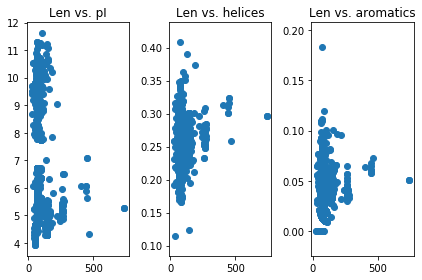

In [4]:
import sys
from Bio import SeqIO
from Bio.SeqUtils import ProtParam
import matplotlib 
from matplotlib import pyplot as plt


def main():
    input_file = 'archaeal_histones_20191211.fa'
    imported_proteins = import_file(input_file)
    imported_proteins_atts = calc_atts(imported_proteins)
    plot_proteins(imported_proteins_atts)
    return True

def import_file(input_file):
    imported_proteins = []
    sequence = None
    seq_len = 0
    gene_count = 0

    with open(input_file, 'r') as fastafile:
        for line in fastafile:
            if '>' in line:
                gene_count += 1
                if sequence is not None:
                    seq_len = len(sequence)
                    protein.append(sequence)
                    protein.append(seq_len)
                    sequence = None
                    imported_proteins.append(protein)
                protein = []
                protein.append(line.rstrip('\n'),)
            elif (len(line) != 0) and (sequence is not None):
                sequence += (line.rstrip('\n'))
            elif (len(line) != 0) and (sequence is None):
                sequence = (line.rstrip('\n'))
        seq_len = len(sequence)
        protein.append(sequence)
        protein.append(seq_len)
        imported_proteins.append(protein)
    return imported_proteins

def calc_atts(imported_proteins):
    imported_proteins_atts = []
    for protein in imported_proteins:
        new_protein = []
        X = ProtParam.ProteinAnalysis(protein[1])
        new_protein.append(protein[0])
        new_protein.append(protein[1])
        new_protein.append(protein[2]) 
        new_protein.append(X.aromaticity())
        new_protein.append(X.isoelectric_point()) 
        new_protein.append(X.secondary_structure_fraction()[0])
        imported_proteins_atts.append(new_protein)
    return imported_proteins_atts

def plot_proteins(imported_proteins_atts):
    fig, ax = plt.subplots(1, 3)
    isos = []
    lengths = []
    helices = []
    aromatics = []
    for protein in imported_proteins_atts:
        isos.append(protein[4])
        lengths.append(protein[2])
        aromatics.append(protein[3])
        helices.append(protein[-1])    
    ax[0].scatter(lengths, isos)
    ax[0].set_title('Len vs. pI')
    ax[1].scatter(lengths, helices)
    ax[1].set_title('Len vs. helices')
    ax[2].scatter(lengths, aromatics)
    ax[2].set_title('Len vs. aromatics')
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    main()

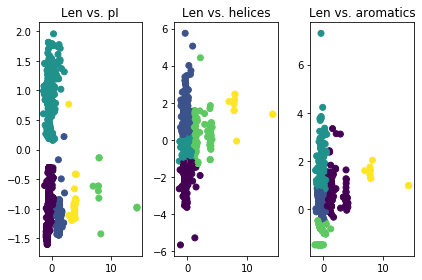

In [3]:
import sys
from Bio import SeqIO
from Bio.SeqUtils import ProtParam
import matplotlib 
from matplotlib import pyplot as plt
import statistics
from statistics import stdev
from statistics import mean
from sklearn.cluster import KMeans
import numpy as np


def main():
    input_file = 'archaeal_histones_20191211.fa'
    imported_proteins = import_file(input_file)
    imported_proteins_atts = calc_atts(imported_proteins)
    plot_proteins(imported_proteins_atts)
    return True

def import_file(input_file):
    imported_proteins = []
    sequence = None
    seq_len = 0
    gene_count = 0

    with open(input_file, 'r') as fastafile:
        for line in fastafile:
            if '>' in line:
                gene_count += 1
                if sequence is not None:
                    seq_len = len(sequence)
                    protein.append(sequence)
                    protein.append(seq_len)
                    sequence = None
                    imported_proteins.append(protein)
                protein = []
                protein.append(line.rstrip('\n'),)
            elif (len(line) != 0) and (sequence is not None):
                sequence += (line.rstrip('\n'))
            elif (len(line) != 0) and (sequence is None):
                sequence = (line.rstrip('\n'))
        seq_len = len(sequence)
        protein.append(sequence)
        protein.append(seq_len)
        imported_proteins.append(protein)
    return imported_proteins

def calc_atts(imported_proteins):
    imported_proteins_atts = []
    for protein in imported_proteins:
        new_protein = []
        X = ProtParam.ProteinAnalysis(protein[1])
        new_protein.append(protein[0])
        new_protein.append(protein[1])
        new_protein.append(protein[2]) 
        new_protein.append(X.aromaticity())
        new_protein.append(X.isoelectric_point()) 
        new_protein.append(X.secondary_structure_fraction()[0])
        imported_proteins_atts.append(new_protein)
    return imported_proteins_atts

def standardize_data(data_list):
    standard_list = []
    list_stdev = statistics.stdev(data_list)
    list_mean = statistics.mean(data_list)
    for i in data_list:
        new_i = (i - list_mean) / list_stdev
        standard_list.append(new_i)
    return standard_list

def plot_proteins(imported_proteins_atts):
    fig, ax = plt.subplots(1, 3)
    isos = []
    lengths = []
    helices = []
    aromatics = []
    for protein in imported_proteins_atts:
        isos.append(protein[4])
        lengths.append(protein[2])
        aromatics.append(protein[3])
        helices.append(protein[-1])
    lengths = standardize_data(lengths)
    helices = standardize_data(helices)
    aromatics = standardize_data(aromatics)
    isos = standardize_data(isos)
    
    random_state = 170
    nc = 5
    
    X = np.c_[lengths, isos]
    y_pred = KMeans(n_clusters=nc, n_init=10, max_iter=300,
            tol=1e-04, random_state=0).fit_predict(X)
    ax[0].scatter(X[:, 0], X[:, 1], c=y_pred)
    ax[0].set_title('Len vs. pI')
    
    X = np.c_[lengths, helices]
    y_pred = KMeans(n_clusters=nc, n_init=10, max_iter=300,
            tol=1e-04, random_state=0).fit_predict(X)
    ax[1].scatter(X[:, 0], X[:, 1], c=y_pred)
    ax[1].set_title('Len vs. helices')
    
    X = np.c_[lengths, aromatics]
    y_pred = KMeans(n_clusters=nc, n_init=10, max_iter=300,
            tol=1e-04, random_state=0).fit_predict(X)
    ax[2].scatter(X[:, 0], X[:, 1], c=y_pred)
    ax[2].set_title('Len vs. aromatics')
    
    plt.tight_layout()
    #plt.savefig('standard.png')
    plt.show()


if __name__ == '__main__':
    main()

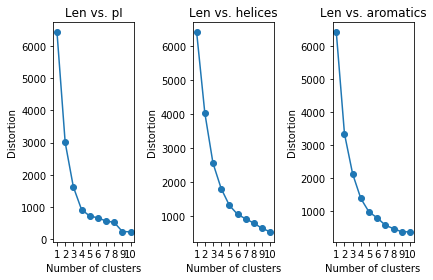

In [41]:
import sys
from Bio import SeqIO
from Bio.SeqUtils import ProtParam
import matplotlib 
from matplotlib import pyplot as plt
import statistics
from statistics import stdev
from statistics import mean
from sklearn.cluster import KMeans
import numpy as np


def main():
    input_file = 'archaeal_histones_20191211.fa'
    imported_proteins = import_file(input_file)
    imported_proteins_atts = calc_atts(imported_proteins)
    plot_proteins(imported_proteins_atts)
    return True

def import_file(input_file):
    imported_proteins = []
    sequence = None
    seq_len = 0
    gene_count = 0

    with open(input_file, 'r') as fastafile:
        for line in fastafile:
            if '>' in line:
                gene_count += 1
                if sequence is not None:
                    seq_len = len(sequence)
                    protein.append(sequence)
                    protein.append(seq_len)
                    sequence = None
                    imported_proteins.append(protein)
                protein = []
                protein.append(line.rstrip('\n'),)
            elif (len(line) != 0) and (sequence is not None):
                sequence += (line.rstrip('\n'))
            elif (len(line) != 0) and (sequence is None):
                sequence = (line.rstrip('\n'))
        seq_len = len(sequence)
        protein.append(sequence)
        protein.append(seq_len)
        imported_proteins.append(protein)
    return imported_proteins

def calc_atts(imported_proteins):
    imported_proteins_atts = []
    for protein in imported_proteins:
        new_protein = []
        X = ProtParam.ProteinAnalysis(protein[1])
        new_protein.append(protein[0])
        new_protein.append(protein[1])
        new_protein.append(protein[2]) 
        new_protein.append(X.aromaticity())
        new_protein.append(X.isoelectric_point()) 
        new_protein.append(X.secondary_structure_fraction()[0])
        imported_proteins_atts.append(new_protein)
    return imported_proteins_atts

def standardize_data(data_list):
    standard_list = []
    list_stdev = statistics.stdev(data_list)
    list_mean = statistics.mean(data_list)
    for i in data_list:
        new_i = (i - list_mean) / list_stdev
        standard_list.append(new_i)
    return standard_list

def plot_proteins(imported_proteins_atts):
    fig, ax = plt.subplots(1, 3)
    isos = []
    lengths = []
    helices = []
    aromatics = []
    for protein in imported_proteins_atts:
        isos.append(protein[4])
        lengths.append(protein[2])
        aromatics.append(protein[3])
        helices.append(protein[-1])
    lengths = standardize_data(lengths)
    helices = standardize_data(helices)
    aromatics = standardize_data(aromatics)
    isos = standardize_data(isos)
    
    X = np.c_[lengths, isos]
    distortions = []
    for i in range(1, 11):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0)
        km.fit_predict(X)
        distortions.append(km.inertia_)

    ax[0].plot(range(1, 11), distortions, marker='o')
    ax[0].set_title('Len vs. pI')
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('Distortion')
    ax[0].set_xticks(range(1, 11))
    
    X = np.c_[lengths, helices]
    distortions = []
    for i in range(1, 11):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0)
        km.fit_predict(X)
        distortions.append(km.inertia_)

    ax[1].plot(range(1, 11), distortions, marker='o')
    ax[1].set_title('Len vs. helices')
    ax[1].set_xlabel('Number of clusters')
    ax[1].set_ylabel('Distortion')
    ax[1].set_xticks(range(1, 11))
    
    X = np.c_[lengths, aromatics]
    distortions = []
    for i in range(1, 11):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0)
        km.fit_predict(X)
        distortions.append(km.inertia_)

    ax[2].plot(range(1, 11), distortions, marker='o')
    ax[2].set_title('Len vs. aromatics')
    ax[2].set_xlabel('Number of clusters')
    ax[2].set_ylabel('Distortion')
    ax[2].set_xticks(range(1, 11))

    plt.tight_layout()
    plt.savefig('kmeans_elbows.png')
    plt.show()


if __name__ == '__main__':
    main()

<IPython.core.display.Javascript object>


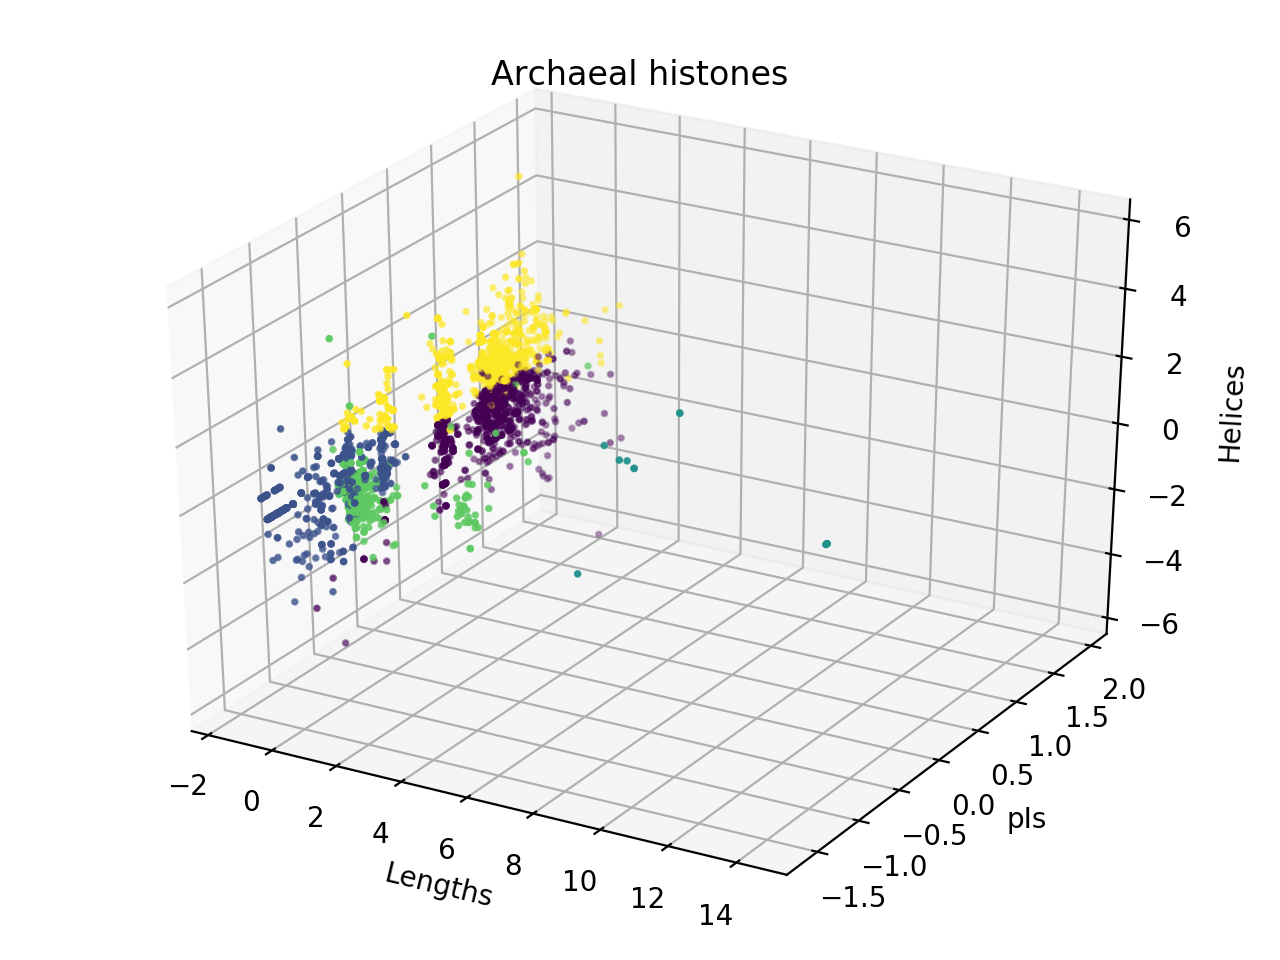

In [6]:
%matplotlib notebook

import sys
from Bio import SeqIO
from Bio.SeqUtils import ProtParam
import matplotlib 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics
from statistics import stdev
from statistics import mean
from sklearn.cluster import KMeans
import numpy as np


def main():
    input_file = 'archaeal_histones_20191211.fa'
    imported_proteins = import_file(input_file)
    imported_proteins_atts = calc_atts(imported_proteins)
    plot_proteins(imported_proteins_atts)
    return True

def import_file(input_file):
    imported_proteins = []
    sequence = None
    seq_len = 0
    gene_count = 0

    with open(input_file, 'r') as fastafile:
        for line in fastafile:
            if '>' in line:
                gene_count += 1
                if sequence is not None:
                    seq_len = len(sequence)
                    protein.append(sequence)
                    protein.append(seq_len)
                    sequence = None
                    imported_proteins.append(protein)
                protein = []
                protein.append(line.rstrip('\n'),)
            elif (len(line) != 0) and (sequence is not None):
                sequence += (line.rstrip('\n'))
            elif (len(line) != 0) and (sequence is None):
                sequence = (line.rstrip('\n'))
        seq_len = len(sequence)
        protein.append(sequence)
        protein.append(seq_len)
        imported_proteins.append(protein)
    return imported_proteins

def calc_atts(imported_proteins):
    imported_proteins_atts = []
    for protein in imported_proteins:
        new_protein = []
        X = ProtParam.ProteinAnalysis(protein[1])
        new_protein.append(protein[0])
        new_protein.append(protein[1])
        new_protein.append(protein[2]) 
        new_protein.append(X.aromaticity())
        new_protein.append(X.isoelectric_point()) 
        new_protein.append(X.secondary_structure_fraction()[0])
        imported_proteins_atts.append(new_protein)
    return imported_proteins_atts

def standardize_data(data_list):
    standard_list = []
    list_stdev = statistics.stdev(data_list)
    list_mean = statistics.mean(data_list)
    for i in data_list:
        new_i = (i - list_mean) / list_stdev
        standard_list.append(new_i)
    return standard_list

def plot_proteins(imported_proteins_atts):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    isos = []
    lengths = []
    helices = []
    aromatics = []
    for protein in imported_proteins_atts:
        isos.append(protein[4])
        lengths.append(protein[2])
        aromatics.append(protein[3])
        helices.append(protein[-1])
    lengths = standardize_data(lengths)
    helices = standardize_data(helices)
    aromatics = standardize_data(aromatics)
    isos = standardize_data(isos)
    
    nc = 5
    
    X = np.c_[lengths, isos, helices]
    y_pred = KMeans(n_clusters=nc, n_init=10, max_iter=300,
            tol=1e-04).fit_predict(X)
    
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred, s=3)
    ax.set_xlabel('Lengths')
    ax.set_ylabel('pIs')
    ax.set_zlabel('Helices')
    ax.set_title('Archaeal histones')
    
    plt.tight_layout()
    #plt.savefig('kmeans_5_clusters.png', dpi=300)
    plt.show()


if __name__ == '__main__':
    main()

<IPython.core.display.Javascript object>


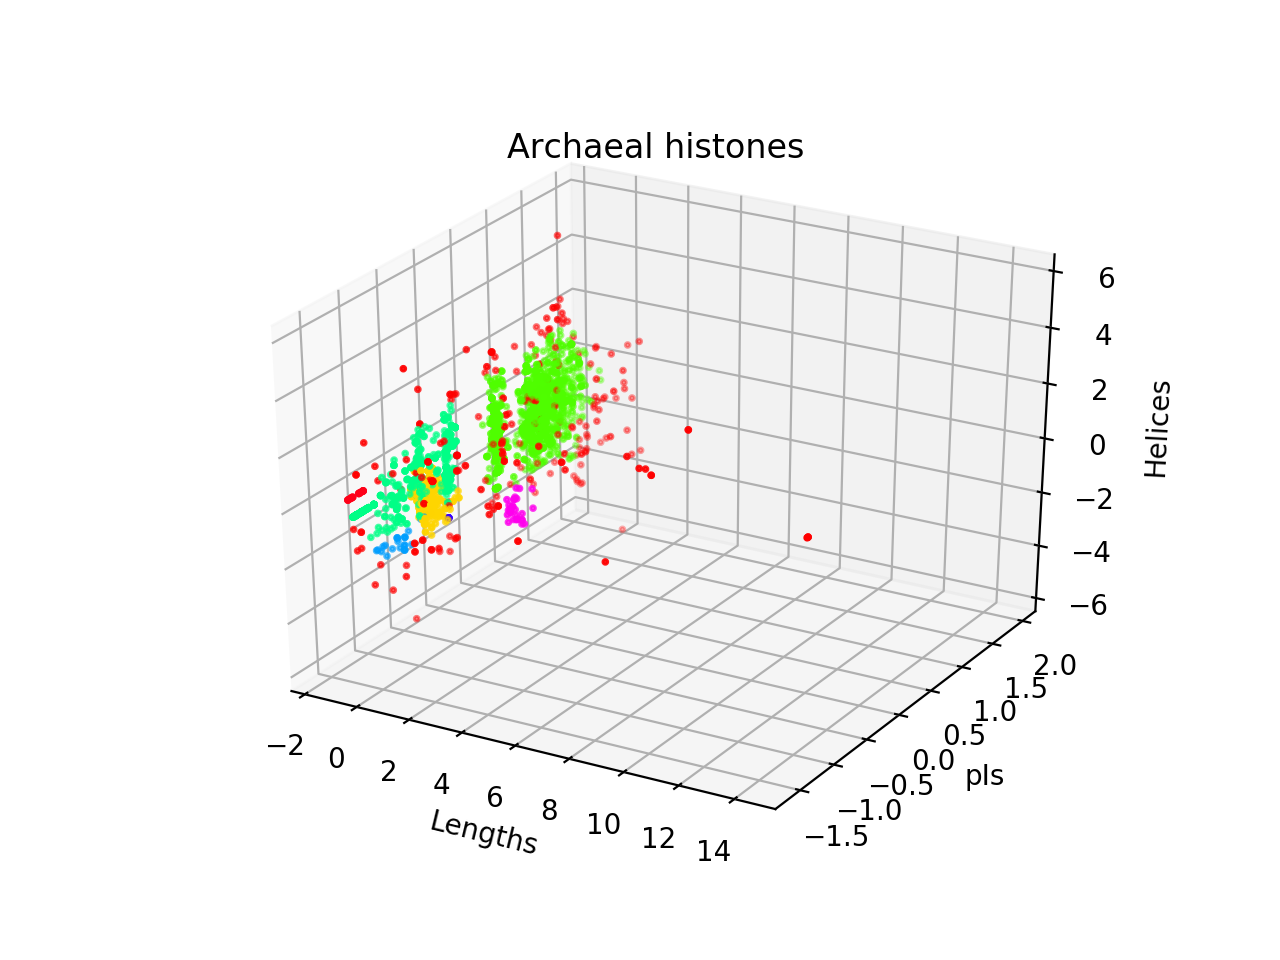

Estimated number of clusters: 7
Estimated number of noise points: 248
Silhouette Coefficient: 0.279


In [25]:
%matplotlib notebook

import sys
from Bio import SeqIO
from Bio.SeqUtils import ProtParam
import matplotlib 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics
from statistics import stdev
from statistics import mean
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np


def main():
    input_file = 'archaeal_histones_20191211.fa'
    imported_proteins = import_file(input_file)
    imported_proteins_atts = calc_atts(imported_proteins)
    plot_proteins(imported_proteins_atts)

def import_file(input_file):
    imported_proteins = []
    sequence = None
    seq_len = 0
    gene_count = 0

    with open(input_file, 'r') as fastafile:
        for line in fastafile:
            if '>' in line:
                gene_count += 1
                if sequence is not None:
                    seq_len = len(sequence)
                    protein.append(sequence)
                    protein.append(seq_len)
                    sequence = None
                    imported_proteins.append(protein)
                protein = []
                protein.append(line.rstrip('\n'),)
            elif (len(line) != 0) and (sequence is not None):
                sequence += (line.rstrip('\n'))
            elif (len(line) != 0) and (sequence is None):
                sequence = (line.rstrip('\n'))
        seq_len = len(sequence)
        protein.append(sequence)
        protein.append(seq_len)
        imported_proteins.append(protein)
    return imported_proteins

def calc_atts(imported_proteins):
    imported_proteins_atts = []
    for protein in imported_proteins:
        new_protein = []
        X = ProtParam.ProteinAnalysis(protein[1])
        new_protein.append(protein[0])
        new_protein.append(protein[1])
        new_protein.append(protein[2]) 
        new_protein.append(X.aromaticity())
        new_protein.append(X.isoelectric_point()) 
        new_protein.append(X.secondary_structure_fraction()[0])
        imported_proteins_atts.append(new_protein)
    return imported_proteins_atts

def standardize_data(data_list):
    standard_list = []
    list_stdev = statistics.stdev(data_list)
    list_mean = statistics.mean(data_list)
    for i in data_list:
        new_i = (i - list_mean) / list_stdev
        standard_list.append(new_i)
    return standard_list

def plot_proteins(imported_proteins_atts):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    isos = []
    lengths = []
    helices = []
    aromatics = []
    for protein in imported_proteins_atts:
        isos.append(protein[4])
        lengths.append(protein[2])
        aromatics.append(protein[3])
        helices.append(protein[-1])
    lengths = standardize_data(lengths)
    helices = standardize_data(helices)
    aromatics = standardize_data(aromatics)
    isos = standardize_data(isos)
    
    X = np.c_[lengths, isos, helices]
    db = DBSCAN(eps=0.3, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='hsv', s=3)
    ax.set_xlabel('Lengths')
    ax.set_ylabel('pIs')
    ax.set_zlabel('Helices')
    ax.set_title('Archaeal histones')
    
    #plt.savefig('DBSCAN_3D.png', dpi=300)
    plt.show()
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, labels))


if __name__ == '__main__':
    main()

In [10]:
%matplotlib notebook

import sys
from Bio import SeqIO
from Bio.SeqUtils import ProtParam
import matplotlib 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics
from statistics import stdev
from statistics import mean
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np


def main():
    input_file = 'archaeal_histones_20191211.fa'
    imported_proteins = import_file(input_file)
    imported_proteins_atts = calc_atts(imported_proteins)
    cluster_data = cluster_proteins(imported_proteins_atts)
    write_clusters(cluster_data)
    return True

def import_file(input_file):
    imported_proteins = []
    sequence = None
    seq_len = 0
    gene_count = 0

    with open(input_file, 'r') as fastafile:
        for line in fastafile:
            if '>' in line:
                gene_count += 1
                if sequence is not None:
                    seq_len = len(sequence)
                    protein.append(sequence)
                    protein.append(seq_len)
                    sequence = None
                    imported_proteins.append(protein)
                protein = []
                protein.append(line.rstrip('\n'),)
            elif (len(line) != 0) and (sequence is not None):
                sequence += (line.rstrip('\n'))
            elif (len(line) != 0) and (sequence is None):
                sequence = (line.rstrip('\n'))
        seq_len = len(sequence)
        protein.append(sequence)
        protein.append(seq_len)
        imported_proteins.append(protein)
    return imported_proteins

def calc_atts(imported_proteins):
    imported_proteins_atts = []
    for protein in imported_proteins:
        new_protein = []
        X = ProtParam.ProteinAnalysis(protein[1])
        new_protein.append(protein[0])
        new_protein.append(protein[1])
        new_protein.append(protein[2]) 
        new_protein.append(X.aromaticity())
        new_protein.append(X.isoelectric_point()) 
        new_protein.append(X.secondary_structure_fraction()[0])
        imported_proteins_atts.append(new_protein)
    return imported_proteins_atts

def standardize_data(data_list):
    standard_list = []
    list_stdev = statistics.stdev(data_list)
    list_mean = statistics.mean(data_list)
    for i in data_list:
        new_i = (i - list_mean) / list_stdev
        standard_list.append(new_i)
    return standard_list

def cluster_proteins(imported_proteins_atts):
    isos = []
    lengths = []
    helices = []
    aromatics = []
    for protein in imported_proteins_atts:
        isos.append(protein[4])
        lengths.append(protein[2])
        aromatics.append(protein[3])
        helices.append(protein[-1])
    lengths = standardize_data(lengths)
    helices = standardize_data(helices)
    aromatics = standardize_data(aromatics)
    isos = standardize_data(isos)
    
    X = np.c_[lengths, isos, helices]
    db = DBSCAN(eps=0.3, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    cluster_data = []
    cluster_null = []
    cluster_0 = []
    cluster_1 = []
    cluster_2 = []
    cluster_3 = []
    cluster_4 = []
    cluster_5 = []
    cluster_6 = []
    
    for label, protein in zip(labels, imported_proteins_atts):
        new_protein = []
        new_protein.append(protein[0])
        new_protein.append(protein[1])
        if label == -1:
            cluster_null.append(new_protein)
        elif label == 0:
            cluster_0.append(new_protein)
        elif label == 1:
            cluster_1.append(new_protein)
        elif label == 2:
            cluster_2.append(new_protein)
        elif label == 3:
            cluster_3.append(new_protein)
        elif label == 4:
            cluster_4.append(new_protein)
        elif label == 5:
            cluster_5.append(new_protein)
        elif label == 6:
            cluster_6.append(new_protein)
            
    cluster_data.append(cluster_0)
    cluster_data.append(cluster_1)
    cluster_data.append(cluster_2)
    cluster_data.append(cluster_3)
    cluster_data.append(cluster_4)
    cluster_data.append(cluster_5)
    cluster_data.append(cluster_6)
    cluster_data.append(cluster_null)
        
    return(cluster_data)

def write_clusters(cluster_data):
    cluster_num = 0
    for cluster in cluster_data:
        if cluster_num == len(cluster_data)-1:
            f = open('cluster_null.fa', 'a')
        else:
            f = open('cluster_{}.fa'.format(cluster_num), 'a')
        for protein in cluster:
            f.write(protein[0]+'\n'+protein[1]+'\n')
        f.close()
        cluster_num += 1
    return True


if __name__ == '__main__':
    main()